# Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

# Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

+ Import the required libraries and modules that you would need.
+ Read that data into Python and call the dataframe churnData.
+ Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
+ Check for null values in the dataframe. Replace the null values.
+ Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    +    Scale the features either by using normalizer or a standard scaler.
    +    Split the data into a training set and a test set.
    + Fit a logistic Regression model on the training data.

# Round 1

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix

In [127]:
df = pd.read_csv("../data/DATA_Customer-Churn.csv")

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [129]:
round(df.describe(),1)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.0,7043.0,7043.0
mean,0.2,32.4,64.8
std,0.4,24.6,30.1
min,0.0,0.0,18.2
25%,0.0,9.0,35.5
50%,0.0,29.0,70.4
75%,0.0,55.0,89.8
max,1.0,72.0,118.8


In [130]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [131]:
# Convert TotalCharges to numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [132]:
round(df.isna().sum()/len(df),4)*100

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [133]:
round((df == 0).sum()/len(df),2)*100

gender               0.0
SeniorCitizen       84.0
Partner              0.0
Dependents           0.0
tenure               0.0
PhoneService         0.0
OnlineSecurity       0.0
OnlineBackup         0.0
DeviceProtection     0.0
TechSupport          0.0
StreamingTV          0.0
StreamingMovies      0.0
Contract             0.0
MonthlyCharges       0.0
TotalCharges         0.0
Churn                0.0
dtype: float64

In [134]:
def fill_values():
    mean_totalcharges = np.mean(df['TotalCharges'])
    df['TotalCharges'] = df['TotalCharges'].fillna(mean_totalcharges)
    return df
fill_values()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


+ Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    + Scale the features either by using normalizer or a standard scaler.
    + Split the data into a training set and a test set.
    + Fit a logistic Regression model on the training data.

In [135]:
# Scale the features either by using normalizer or a standard scaler.
new_df = df.filter(["tenure","SeniorCitizen","MonthlyCharges","TotalCharges"], axis=1)
new_df

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


scaler_train = StandardScaler().fit(new_df)
new_df_scaled = scaler_train.transform(new_df)
new_df_scaled

In [136]:
# Split the data into a training set and a test set
X = new_df
y = df['Churn']

,Error_metric,Train,Test
0,Accuracy,0.788782,0.801278
1,Precision,0.652482,0.699187
2,Recall,0.431925,0.455026


Confusion matrix for the train set
[[3800  343]
 [ 847  644]]


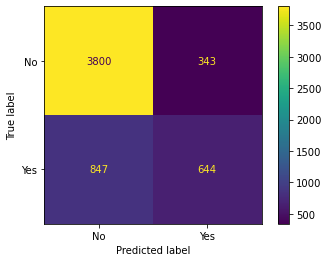



Confusion matrix for the test set
[[957  74]
 [206 172]]


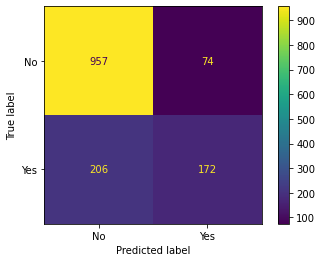

In [190]:
# Fit a logistic Regression model on the training data

log = LogisticRegression() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()
trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                        precision_score(y_train, y_pred_train_log, pos_label='Yes'),
                                        recall_score(y_train, y_pred_train_log, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log, pos_label='Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()